# **CUSTOMER CHUN ANALYSIS**

<p>This is a telecommunication company that includes customer information such as demographics, usage patterns churned or not churned.</p>

In [69]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [70]:
#Let us load our dataset
telecom = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [71]:
#Let us view the first 10 observations from the dataset
telecom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [72]:
#We would determine the size of our dataset in the format(row,column)
telecom.shape

(7043, 21)

In [73]:
#You would observe that there are 7043 rows and 21 columns in this dataset
#Let us view the size of our dataset
telecom.size

147903

In [74]:
#Now, we know the size of our data
#Let us check the properties of our dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
#Let us see the statistical summary of each numerical feature
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [76]:
telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
#Let's check for missing values within the dataset
telecom.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# ***OUTLIERS***

<p>This is an important step in data cleaning and preprocessing. They can give helpful insights into the data one is studying, and they can have an effect on statistical results. This can potentially help one disover inconsistencies and detect any errors in the statistical processes.Therefore, knowing how to find outliers in a dataset would help us better understand our data. It is also an observation that differs significantly, either an extremely high or low data point relative to the nearest data point, that rests on the neighbouring existing values in a dataset.</p>

<p><i>It is observed that there are no missing values within the dataset. Hence, let us check for outliers using a box plot and check for duplicates.<i></p>

<Axes: >

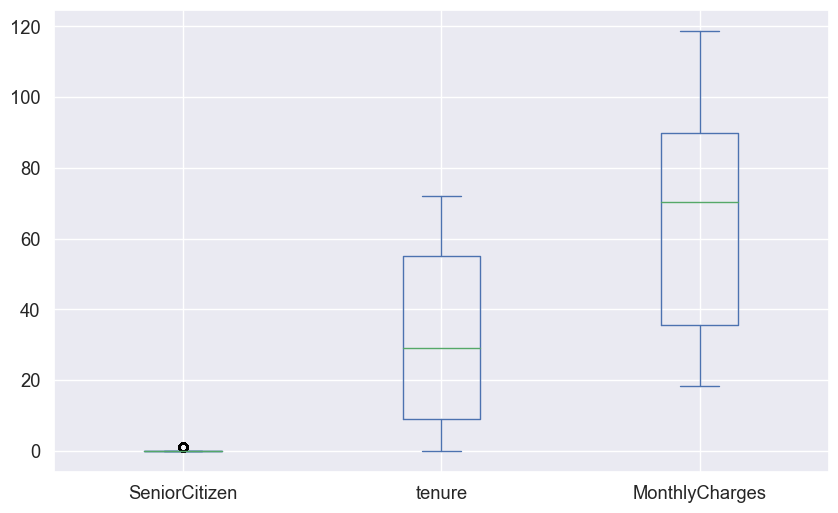

In [78]:
telecom.plot(kind = 'box', vert = True, figsize = (10, 6))

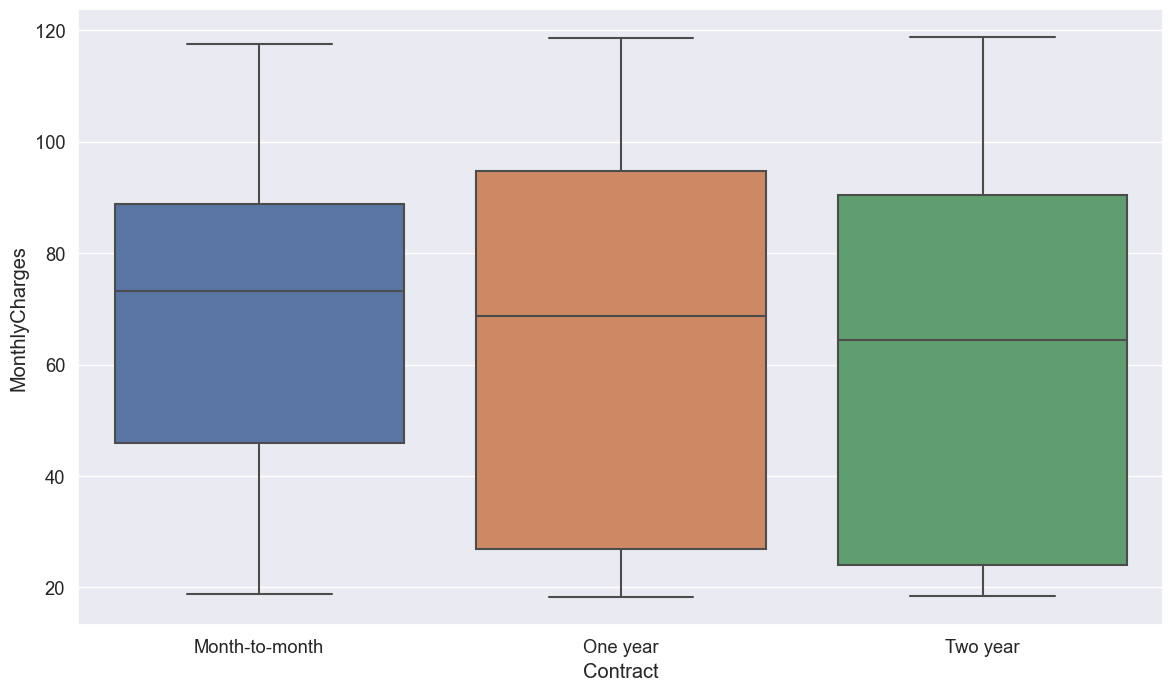

In [79]:
fig = plt.subplots(figsize = (14,8))
sns.set(style = "whitegrid")
ax = sns.boxplot(x = telecom["Contract"], y=telecom["MonthlyCharges"])

In [80]:
#Here is an interactive boxplot showing the contract by monthly charges
#It is observed that there are no outliers
fig = px.box(telecom, x='Contract', y='MonthlyCharges')
fig.show()



In [81]:
outlier_check = telecom[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
outlier_check.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [82]:
#First quartile 
Q1 = outlier_check.quantile(0.25)
#Second quartile
Q3 = outlier_check.quantile(0.75)
#Interquartile range
IQR = Q3 - Q1
print(IQR, Q3, Q1)

SeniorCitizen      0.00
tenure            46.00
MonthlyCharges    54.35
dtype: float64 SeniorCitizen      0.00
tenure            55.00
MonthlyCharges    89.85
Name: 0.75, dtype: float64 SeniorCitizen      0.0
tenure             9.0
MonthlyCharges    35.5
Name: 0.25, dtype: float64


In [83]:
#Upperbound of the quartile
print((Q3 + 1.5 * IQR))

SeniorCitizen       0.000
tenure            124.000
MonthlyCharges    171.375
dtype: float64


In [84]:
#Lowerbound of the quartile
print((Q1 - 1.5 * IQR))

SeniorCitizen      0.000
tenure           -60.000
MonthlyCharges   -46.025
dtype: float64


In [85]:
#Defining  function to determine the total outliers
def total_outliers(X, Y):
    c = 0
    for i in X:
        if i > Y:
            c +=1
    print(c)
    

In [86]:
total_outliers(outlier_check.tenure, 124)

0


In [87]:
total_outliers(outlier_check.tenure, 171.375)

0


<p><i>In summary, after reviewing our numerical values, it is observed that there are no outliers, therefore, the dataset is good enough to calculate the mean.</i></p>

<Axes: ylabel='Density'>

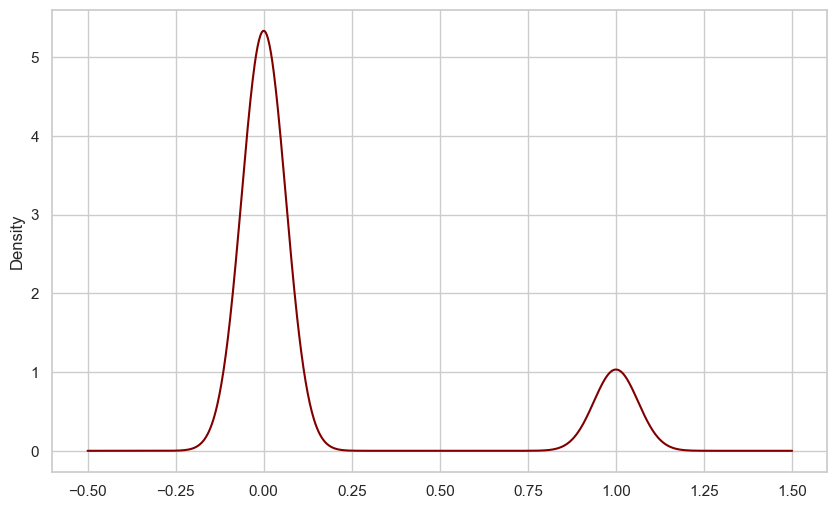

In [88]:
telecom['SeniorCitizen'].plot(kind = 'density', figsize = (10,6), color = 'maroon')

<Axes: ylabel='Density'>

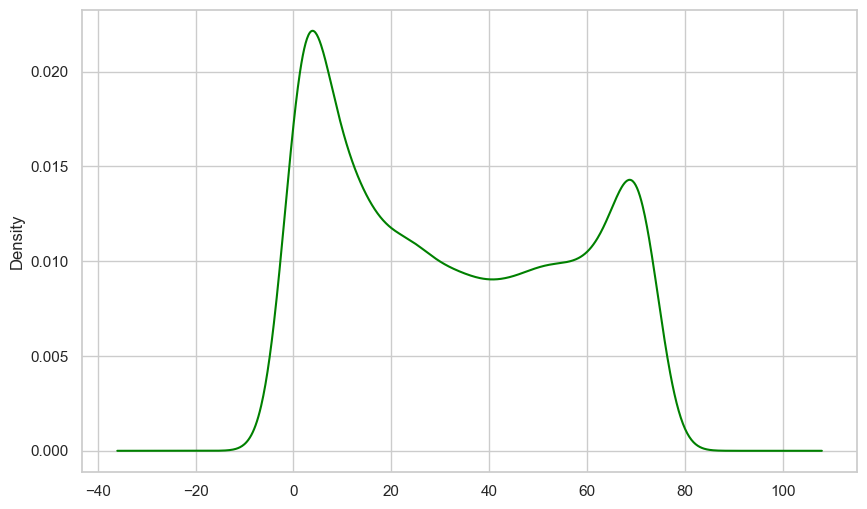

In [89]:
telecom['tenure'].plot(kind = 'density', figsize = (10,6), color = 'green')

<Axes: ylabel='Density'>

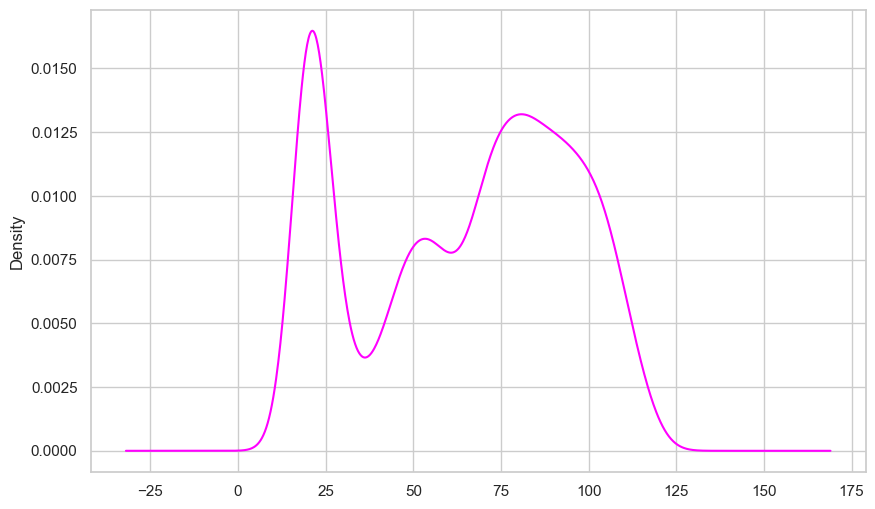

In [90]:
telecom['MonthlyCharges'].plot(kind = 'density', figsize = (10,6), color = 'magenta')

## *Duplicated Values*

In [91]:
#Now, let's check for duplicte values
telecom.duplicated().sum()

0

<p><i>To further the analysis, we would have to drop unnecessary columns.</i></p>

In [92]:
telecom.drop(columns = 'customerID', inplace = True)
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 

##  **ONE HOT CODING**

<p><i> Now, we would model our dataset by creating dummy variables with a pipeline.</i></p>

We would install scikit-learn before we proceed.
Now, let us get to it.

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [94]:
sir = ohe = OneHotEncoder()

In [95]:
#telcom_enc = telcom.replace({'gender': {'Male': 1, 'Female': 0}})
#telecom_enc['gender'] = telcom['gender'].map({'Male': 1, 'Female': 0})
target = telecom['gender'].map({'Male': 1, 'Female': 0})
X = ohe.fit_transform(np.array(telecom[['gender']]).reshape(-1,1))
y = np.array(target)
print(X, y)


  (0, 0)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (7018, 1)	1.0
  (7019, 0)	1.0
  (7020, 1)	1.0
  (7021, 1)	1.0
  (7022, 1)	1.0
  (7023, 0)	1.0
  (7024, 1)	1.0
  (7025, 0)	1.0
  (7026, 0)	1.0
  (7027, 1)	1.0
  (7028, 0)	1.0
  (7029, 0)	1.0
  (7030, 0)	1.0
  (7031, 1)	1.0
  (7032, 1)	1.0
  (7033, 1)	1.0
  (7034, 0)	1.0
  (7035, 1)	1.0
  (7036, 0)	1.0
  (7037, 0)	1.0
  (7038, 1)	1.0
  (7039, 0)	1.0
  (7040, 0)	1.0
  (7041, 1)	1.0
  (7042, 1)	1.0 [0 1 1 ... 0 1 1]


In [96]:
'''telecom_enc = pd.get_dummies(telcom, columns=['gender'], prefix=['gender'])

X = sir.fit_transform(telcom_enc[['gender']])
#y = telcom_enc.gender
sir.categories_'''

"telecom_enc = pd.get_dummies(telcom, columns=['gender'], prefix=['gender'])\n\nX = sir.fit_transform(telcom_enc[['gender']])\n#y = telcom_enc.gender\nsir.categories_"

In [97]:
##Let's check for labels for each Categorical variables before we proceed.
for col in telecom.columns:
    print(col, ': ', len(telecom[col].unique()), 'labels')

gender :  2 labels
SeniorCitizen :  2 labels
Partner :  2 labels
Dependents :  2 labels
tenure :  73 labels
PhoneService :  2 labels
MultipleLines :  3 labels
InternetService :  3 labels
OnlineSecurity :  3 labels
OnlineBackup :  3 labels
DeviceProtection :  3 labels
TechSupport :  3 labels
StreamingTV :  3 labels
StreamingMovies :  3 labels
Contract :  3 labels
PaperlessBilling :  2 labels
PaymentMethod :  4 labels
MonthlyCharges :  1585 labels
TotalCharges :  6531 labels
Churn :  2 labels


## **HYPOTHESIS TESTING**

<p><i><h4> It is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution.</h4></i></p>

<p><i><h5>We would carry Hypotheis testing using T-test on the Churn feature to determine between churned and non-churned customers.</h5></i></p>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [98]:
from scipy import stats

In [99]:
telecom['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [100]:
#Churned customers
churn = telecom[telecom['Churn'] == 'Yes']['MonthlyCharges']
#Non-churned customers
non_churn = telecom[telecom['Churn'] == 'No']['MonthlyCharges']

#Perform a two sample t-test (assuming unequal variances)
t_statistic, p_value = stats.ttest_ind(churn, non_churn, equal_var=False)

#Print the t-statistic and p-value
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

#Define the significance level (alpha)
alpha = 0.05

#Compare the p-value to alpha and make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between churned and non-churned customers.")

t-statistic: 18.407526676414673
p-value: 8.59244933154705e-73
Reject the null hypothesis. There is a significant difference between churned and non-churned customers.


<p>Now we can visualize!!</p>

## **VISUALIZATION**

In [101]:
counts = telecom['gender'].value_counts()
print(counts)

gender
Male      3555
Female    3488
Name: count, dtype: int64


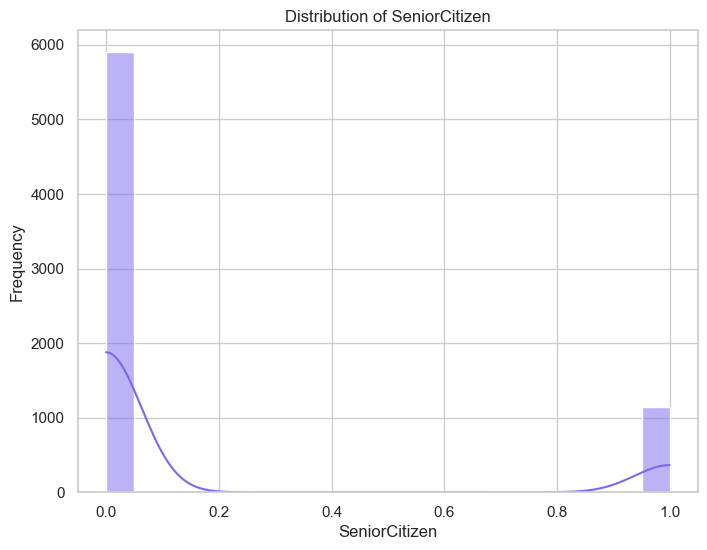

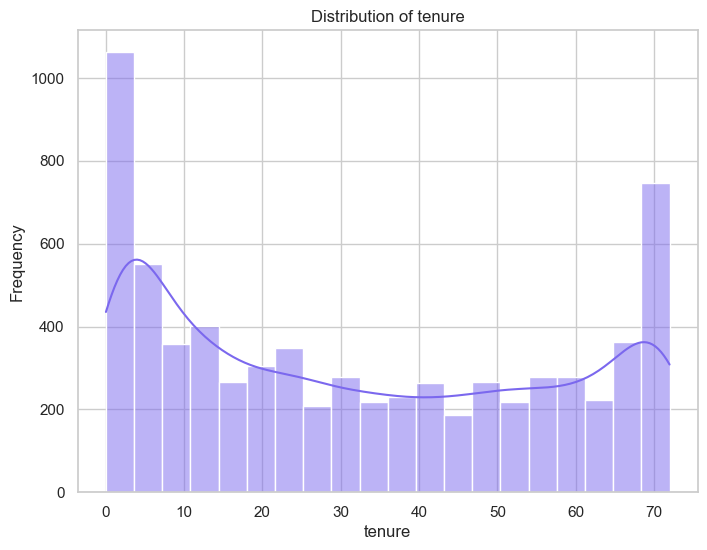

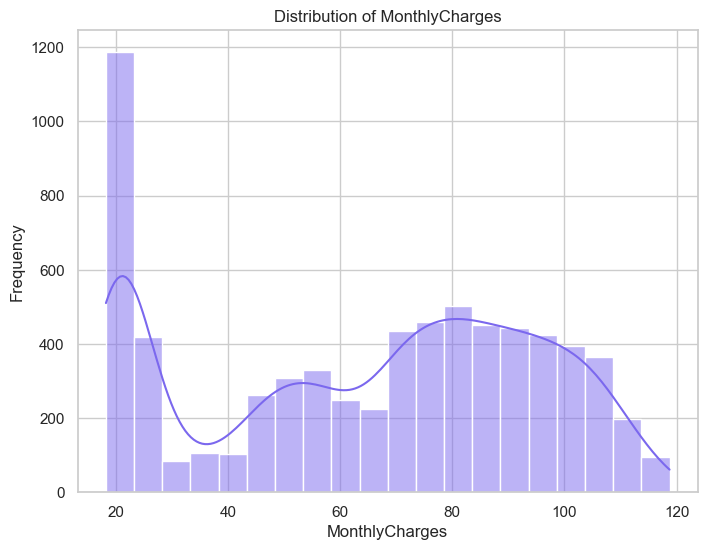

In [102]:
numeric = telecom.select_dtypes(include=['float64', 'int64']).columns

for values in numeric:
    plt.figure(figsize=(8, 6))
    
    #Distribution plot consisting of bar and dendity plots
    sns.histplot(telecom[values], kde=True, bins=20, color='mediumslateblue')
    
    # Set labels and title
    plt.xlabel(values)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {values}')
    
    plt.show()

<p><i>Now, we move to correlation.</i></p>

## **CORRELATION**

In [103]:
sns.set(color_codes=True, font_scale=1.2)

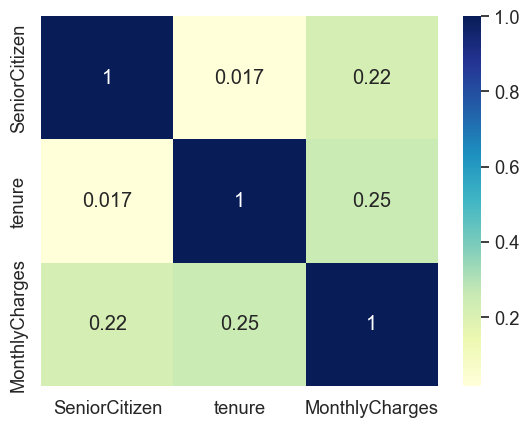

In [104]:
outlier_check_plot = sns.heatmap(outlier_check.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [105]:
corr = telecom[['SeniorCitizen', 'tenure', 'MonthlyCharges']].corr()
display(corr)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


[Text(0.5, 1.0, 'Correlation Heatmap')]

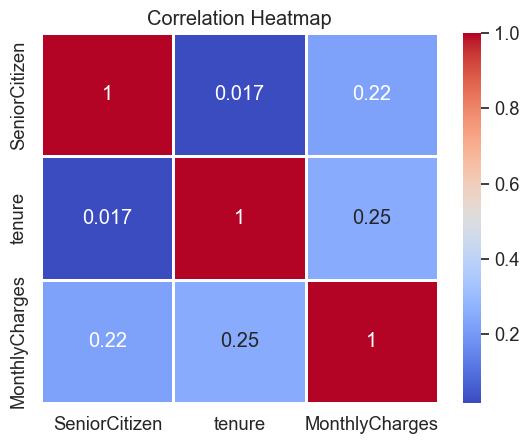

In [106]:
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1).set(title = 'Correlation Heatmap')

In [107]:
fig = px.imshow(corr, text_auto=True, title='Correlation Heatmap')
fig.show()

In [108]:
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **SUMMARY TABLE**

In [109]:
#Create summary tables and statistics for various customer segments (e.g., by contract type, payment method).
summary_table = telecom.groupby('Contract').agg({
    'MonthlyCharges': ['count', 'mean', 'std', 'median'],
    'tenure': ['count', 'mean', 'std', 'median']
}).reset_index()

#Rename the columns for clarity
summary_table.columns = ['Category',
                         'MonthlyCharges_Count', 'MonthlyCharges_Mean', 'MonthlyCharges_Std', 'MonthlyCharges_Median',
                         'Tenure', 'Tenure_Mean', 'Tenure_Std', 'Tenure_Median'
                         ]

#Display the Summary Table
print('Summary based on Contract\n')
display(summary_table)

Summary based on Contract



,Category,MonthlyCharges_Count,MonthlyCharges_Mean,MonthlyCharges_Std,MonthlyCharges_Median,Tenure,Tenure_Mean,Tenure_Std,Tenure_Median
0,Month-to-month,3875,66.398490,26.926599,73.25,3875,18.036645,17.689054,12.0
1,One year,1473,65.048608,31.840539,68.75,1473,42.044807,19.035883,44.0
2,Two year,1695,60.770413,34.678865,64.35,1695,56.735103,18.209363,64.0


In [110]:
#Create summary tables and statistics for various customer segments (e.g., by contract type, payment method).
summary_table = telecom.groupby('PaymentMethod').agg({
    'MonthlyCharges': ['count', 'mean', 'std', 'median'],
    'tenure': ['count', 'mean', 'std', 'median']
}).reset_index()

#Rename the columns for clarity
summary_table.columns = ['Category',
                         'MonthlyCharges_Count', 'MonthlyCharges_Mean', 'MonthlyCharges_Std', 'MonthlyCharges_Median',
                         'Tenure', 'Tenure_Mean', 'Tenure_Std', 'Tenure_Median'
                         ]

#Display the Summary Table
print('Summary based on Payment Method\n')
display(summary_table)

Summary based on Payment Method



,Category,MonthlyCharges_Count,MonthlyCharges_Mean,MonthlyCharges_Std,MonthlyCharges_Median,Tenure,Tenure_Mean,Tenure_Std,Tenure_Median
0,Bank transfer (automatic),1544,67.192649,30.555200,73.100,1544,43.656736,23.197901,48.0
1,Credit card (automatic),1522,66.512385,30.612424,73.025,1522,43.269382,23.339581,47.0
2,Electronic check,2365,76.255814,24.053655,80.550,2365,25.174630,22.382301,18.0
3,Mailed check,1612,43.917060,26.314665,34.700,1612,21.830025,21.218374,15.0
